# Segunda parte del analisis exploratorio de datos

En esta parte nos centraremos en el analisis univariado y bivariado de algunas de las variables que componen el dataset

In [2]:
# Importamos las librerias con las cuales trabajaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_crabs = pd.read_csv("crabs.csv")

## Analisis Univariado de las variables

Vamos a hacer un histograma para ver como se distribuyen las variables numericas del dataset


# Histogramas de variables numéricas


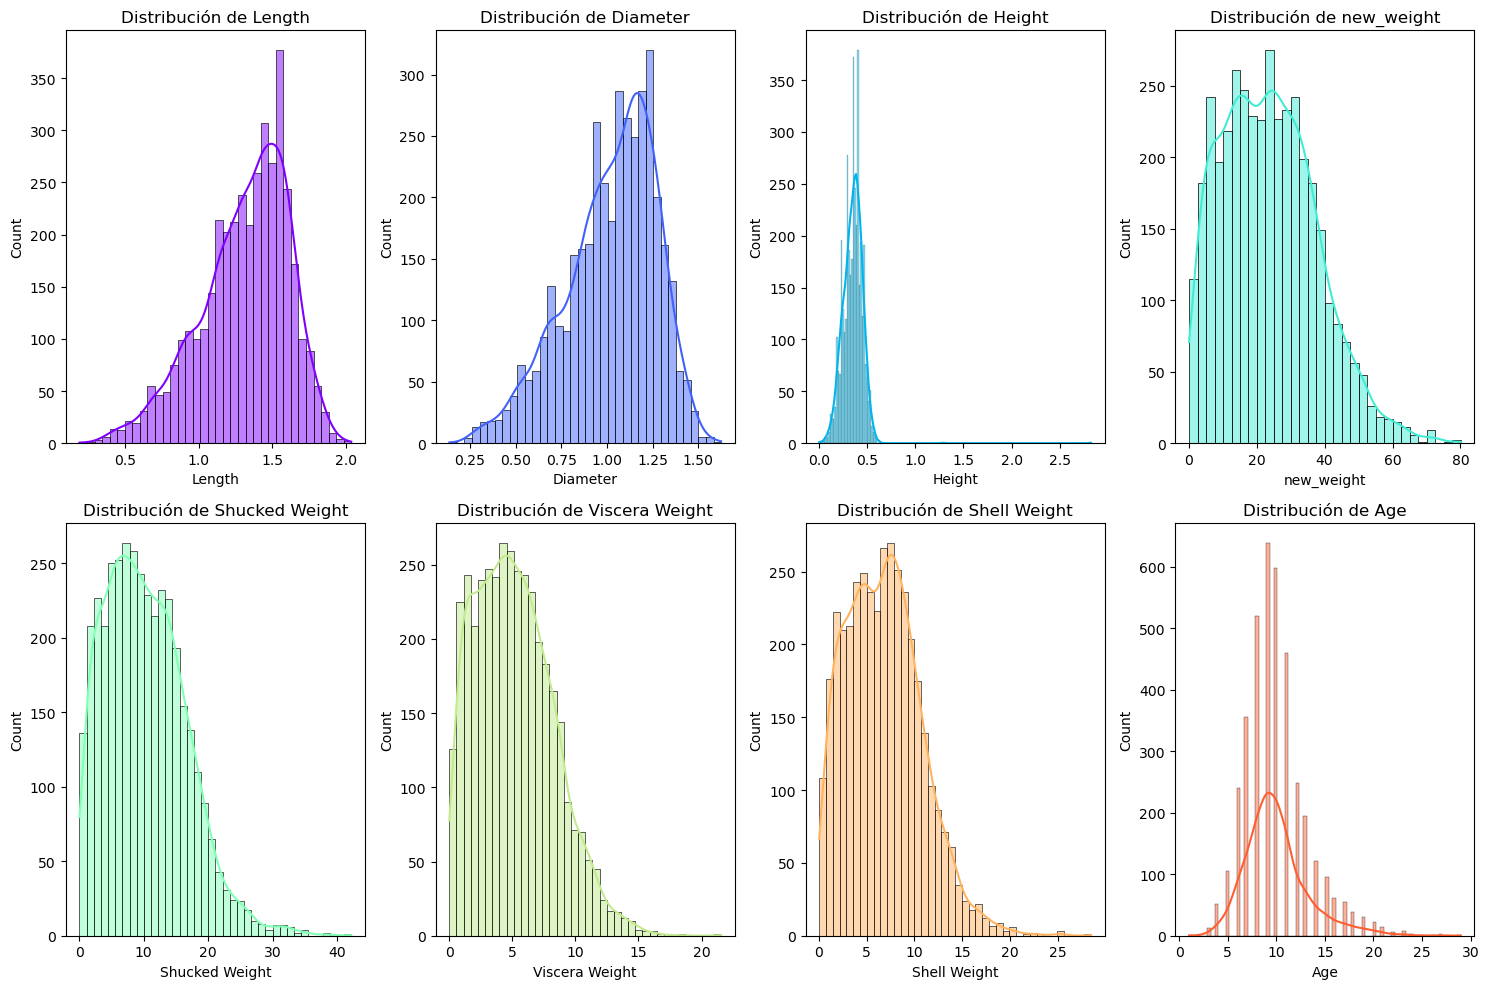

In [4]:
# Histogramas
print("\n# Histogramas de variables numéricas")
num_cols = ['Length', 'Diameter', 'Height', 'new_weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_crabs[col], kde=True, color=plt.cm.rainbow(i/len(num_cols)))
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Vamos a ver si existe presencia de valores atipicos (outlayer) en para las variables numericas


# Boxplots de variables numéricas


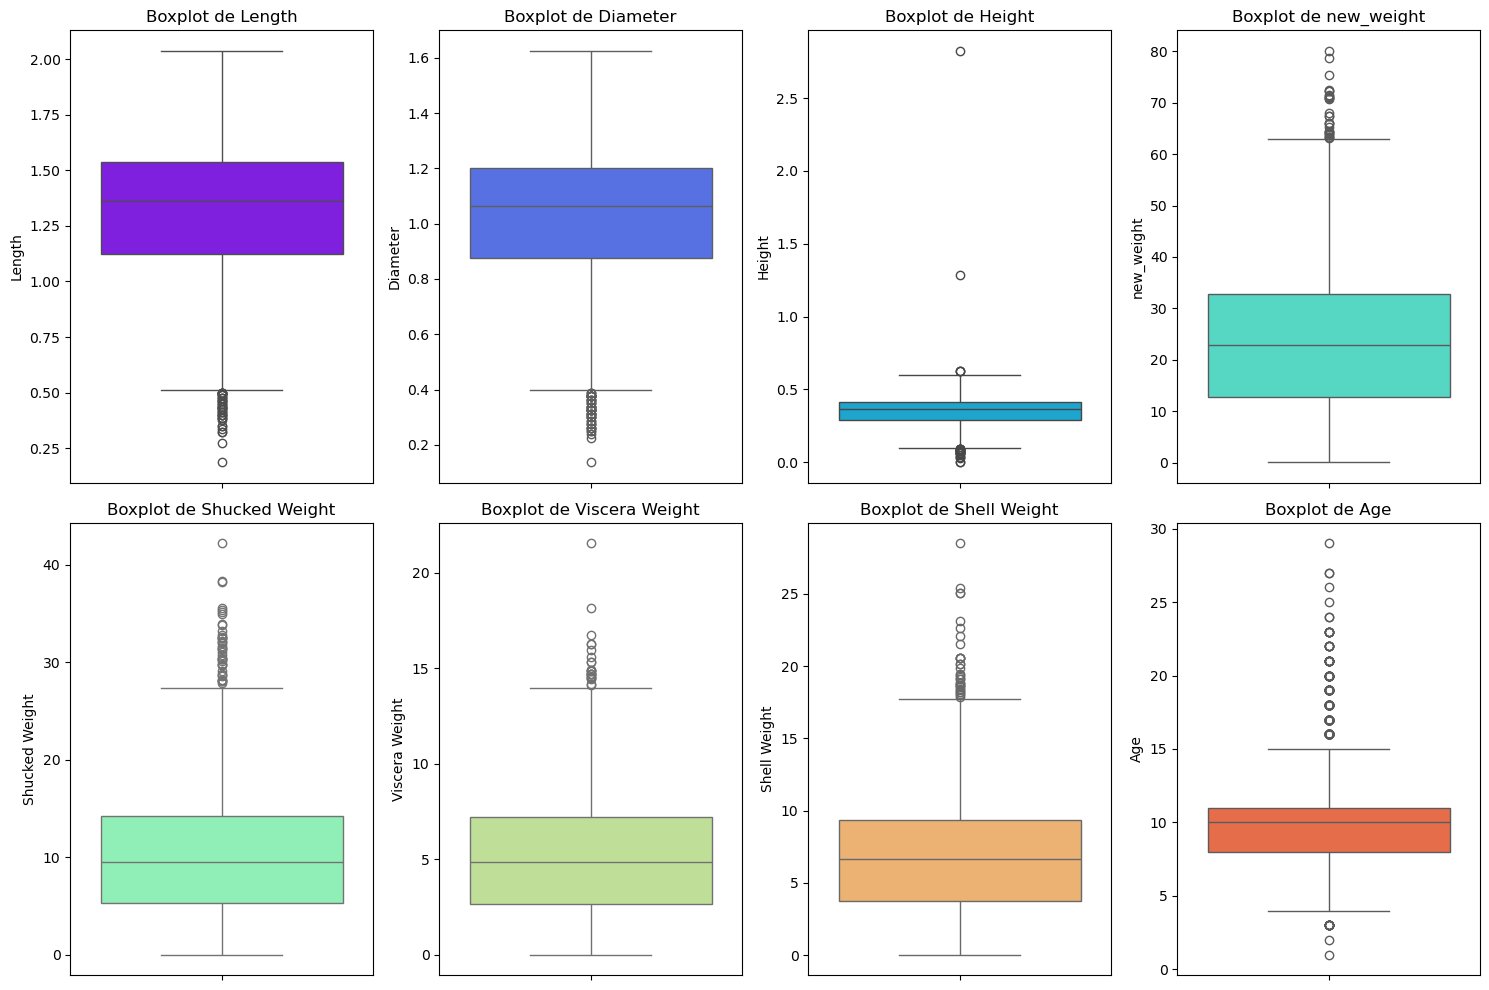

In [5]:
# Diagramas de caja y bigote
print("\n# Boxplots de variables numéricas")
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_crabs[col], color=plt.cm.rainbow(i/len(num_cols)))
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### Concluciones
Aqui veremos algunas de  las concluciones que he extraido de las graficas anteriores:

* Primeramente la variables 'Length' y 'Diameter' tienen distribuciones parecidas segun lo que se puede ver en las graficas, esto es algo que tambien podemos verlo con las variables 'new_weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight' que al parecer tambien tienen distribuciones similares.
* Tambien podemos notar la existencia de valores atipicos(outlayers) para todas las variables representadas.


Veamos ahora la unica variable categorica del dataset 'Sex'



# Gráfico de barras de la variable 'Sex'


C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1856\972577673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='tab10')


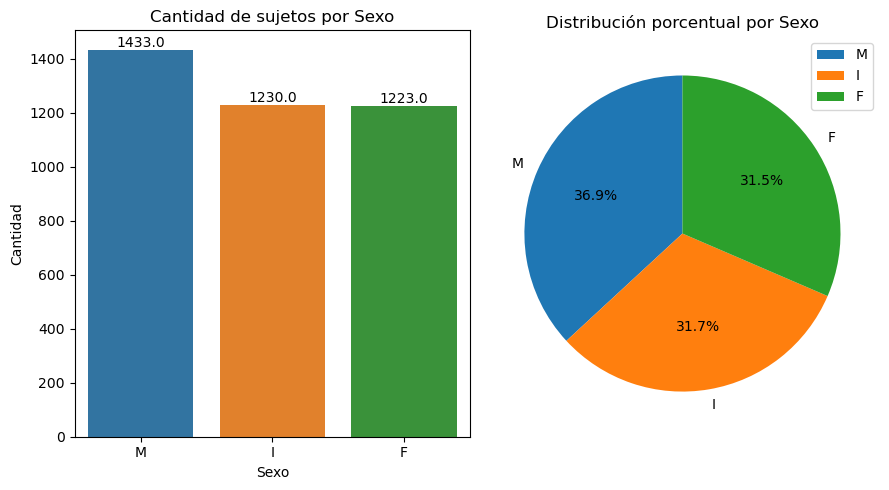

In [6]:
# Gráfico de barras para la variable 'Sex'
print("\n# Gráfico de barras de la variable 'Sex'")
sex_counts = df_crabs['Sex'].value_counts()
plt.figure(figsize=(9, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
bars = sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='tab10')
plt.title('Cantidad de sujetos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')

# Agregar la cantidad en la punta de cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', color='black')

# Gráfico de pastel
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10'))
plt.title('Distribución porcentual por Sexo')
plt.legend(sex_counts.index, loc="best")
plt.tight_layout()
plt.show()

### Concluciones:
Analizando la variable 'Sex' notamos que entre las muestras recojidas (cangrejos para este estudio) se desconoce el sexo de aproximadamente el 32% de ellas, lo cual indicaria problemas en la recoleccion de esta caracteristica y tambien que solo conocemose el sexo de aproximadamente el 69% de los cangrejos

## Analisis multivariado de las variables

Vamos a ver si existe relacion entre las variables que estamos estudiando y si es asi que tan fuerte es.Para ello usaremos las matriz de correlacion


# Matriz de Correlación


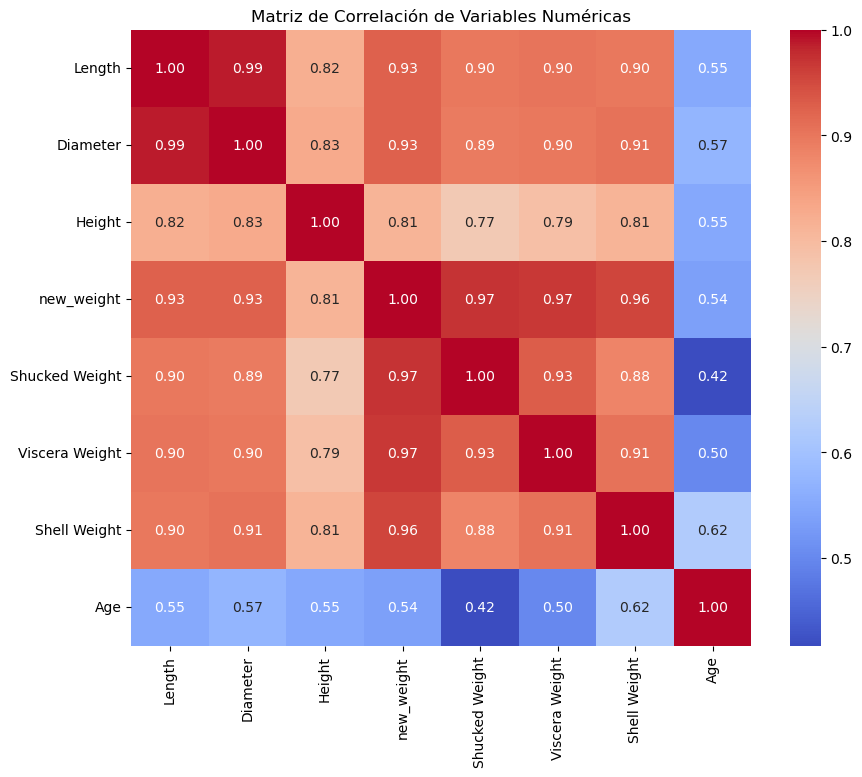

In [7]:
# Matriz de correlación para variables numéricas
print("\n# Matriz de Correlación")
correlation_matrix = df_crabs[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Concluciones:

1-Al ver la matriz notamos que existe una relacion clara entre new_weight el cual tiene una correlacion:
- Con la variable Shucked Weight de 0.97
- Con la variable Viscera Weight 0.97
- Con la variable Shell Weight 0.96

Esto es muy bueno ya que la situacion problemica nos dice que originalmente la empresa no tiene acceso a Shucked Weight(peso de la carne),Viscera Weight(peso de las viceras), Shell Weight(peso del caparazon,tenazas etc) ya que esto implicaria matar al animal y la empresa los comercializa vivos. <u>Con esto y al ver que se distribuian de manera similiar empezamos a sospechar que un modelo de regresion lineal seria util para resolver el problema </u>

2-Se observa tambien que la variable 'Age' es de todas la que menos correlacion presenta con el resto de variables ya que el resto de las mismas presenta una correlacion entre ellas mayores a 0.80


Siguiendo las pistas que nos ofrecen parte de las concluciones anteriores hagamos un Pairplot el cual nos ayudara con para visualizar relaciones entre pares de variables numéricas de interes ('new_weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight') las cuales ya habian llamado nuestra atencion para la resolucion del problema y veamos si podemos extraer aun mas informacion

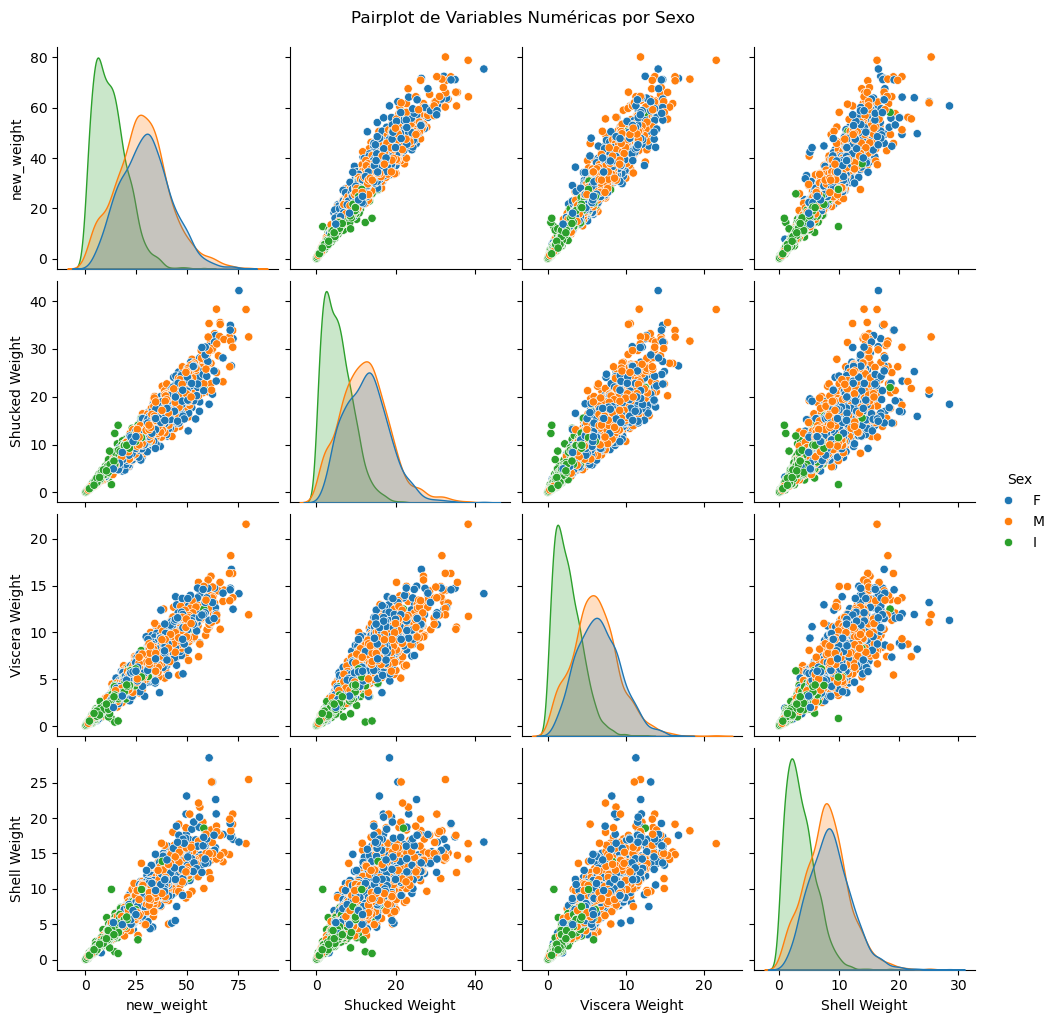

In [8]:
# Pairplot 
sns.pairplot(df_crabs[['new_weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Sex' ]], hue='Sex', diag_kind='kde')
plt.suptitle('Pairplot de Variables Numéricas por Sexo', y=1.02)
plt.show()

### Concluciones:
* Notemos que los cangrejos a los cuales se les desconce el sexo "I" son los que aparentemente presentan un valores en las variables de interes menores y los que son de sexo (masculino y femenino) son los que presentan unos mayores valores en las variables que estamos analizando. 

### Variables categoricas vs variables numericas (veamos el contraste)

Ahora ahora haremos los boxplots para cada una de las variables que captaron nuestra atencion ('new_weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight') y lo contrastaremos con la variable 'Sex' 

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1856\4065442466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='new_weight', data=df_crabs, palette="rainbow")
C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1856\4065442466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Shucked Weight', data=df_crabs, palette="rainbow")
C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1856\4065442466.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Viscera Weight', data=df_crabs, palette="rainbow")
C:\Users\delhy.p

Text(0.5, 1.0, 'Shell Weight por Sexo')

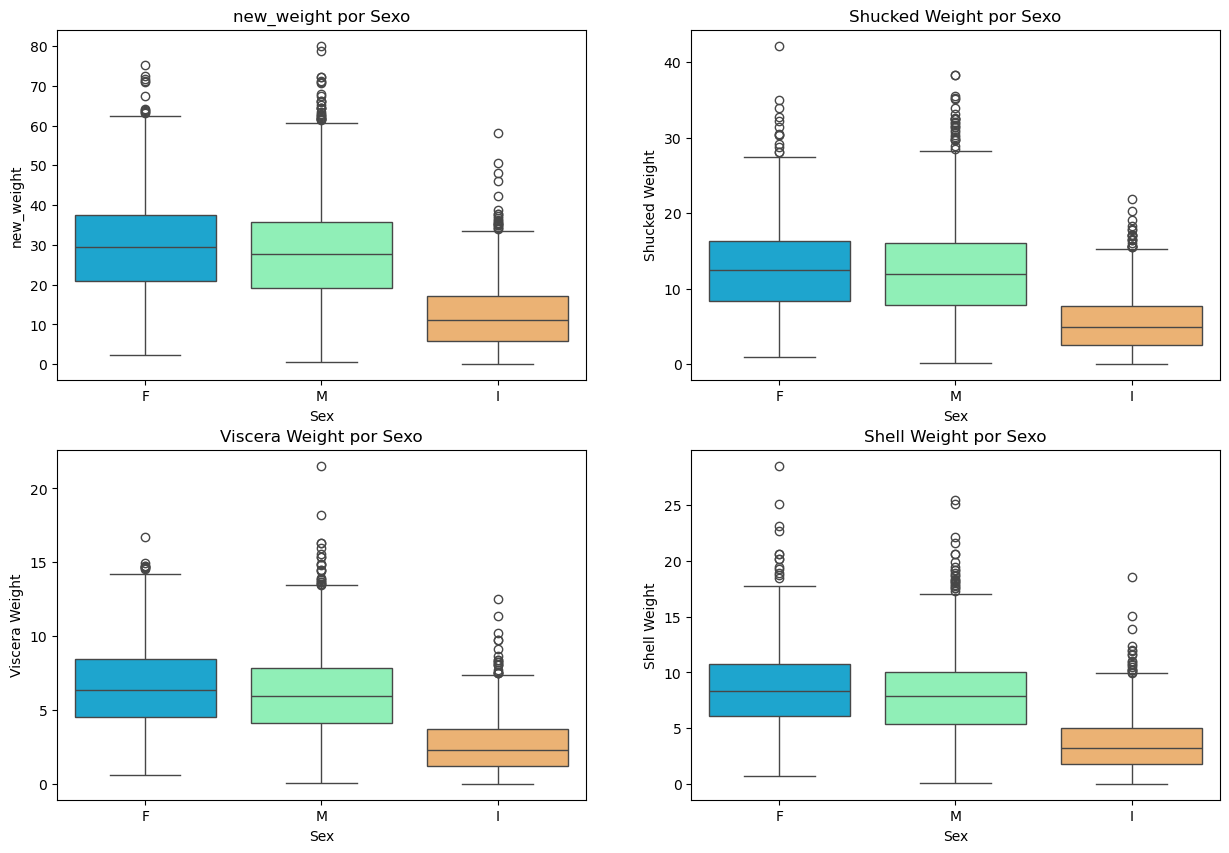

In [9]:
# Boxplot de variables 
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Sex', y='new_weight', data=df_crabs, palette="rainbow")
plt.title('new_weight por Sexo')

plt.subplot(2, 2, 2)
sns.boxplot(x='Sex', y='Shucked Weight', data=df_crabs, palette="rainbow")
plt.title('Shucked Weight por Sexo')

plt.subplot(2, 2, 3)
sns.boxplot(x='Sex', y='Viscera Weight', data=df_crabs, palette="rainbow")
plt.title('Viscera Weight por Sexo')

plt.subplot(2, 2, 4)
sns.boxplot(x='Sex', y='Shell Weight', data=df_crabs, palette="rainbow")
plt.title('Shell Weight por Sexo')


### Concluciones:

- Aqui ocurre algo interesante que se veia venir desde que hicimos el Pairplot y es que los cangrejos de los cuales desconocemos su sexo presentan outlayers menores de los que si conocemos su sexo es decir: <u> Un outlayer de un cangrejo de Sex: "I" tiende a ser menor que un outlayer de un cangrejo de Sex: "F" o "M"</u>


## Fin de la parte 2

En esta parte de Analisis Exploratorio de Datos que estamos realizando hicimos un analisis univariado y posteriormente uno bivariado (centrado en las variables new_weight, Shucked Weight, Viscera Weight, Shell Weight) ya que estas por su alta correlacion resultan atractivas para resolver nuestra situacion problemica. 

No obstante aun quedan preguntas por resolver:
- Que tratamiento daremos a los valores atipicos (outlayers) 
- Cual modelo escorejemos para la resolucion final del problema

Demos respuesta a estas igconitas y mas en las proximas partes de estos analisis. <u>Te veo en la parte 3</u>
